# <h1 style="color: red;">EDA ON TELECOM CUSTOMER CHURN

<h1 style="color: BLUE;">Importing Libraries :-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Import Libraries Successfully')

Import Libraries Successfully


<h1 style="color: blue;">Data Loading  And Explortion :-

In [2]:
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
## Data Shape 

print('Shape of data : {}'.format(df.shape))
print('Number of row : {}'.format(df.shape[0]))
print('Number of columns : {}'.format(df.shape[1]))

Shape of data : (7043, 21)
Number of row : 7043
Number of columns : 21


In [5]:
df['customerID'].duplicated().sum()

np.int64(0)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<h1 style="color: blue;"> Information About Data :- 

In [7]:
## To Check data type and null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<h1 style="color: blue;">Drop Customer_Id Column

In [9]:
df = df.drop(['customerID'], axis = 1)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### 1. Replacing blanks with 0 as tenure is 0 and total charges are recorded.

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] =df["TotalCharges"].astype("float")

### 2. Find Any Missing And Duplicates Values :-

In [11]:
print(df.isna().sum().sort_values(ascending = False))
print('Duplicated Values in data are', df.duplicated().sum())
print('duplicated dropped')

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Duplicated Values in data are 22
duplicated dropped


### 3. Converted 0 and 1 values of SeniorCitizen to YES or NO to make it easier to understand :

In [12]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return"No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


<h1 style="color: blue;">Data Visualization

<Axes: xlabel='Churn', ylabel='count'>

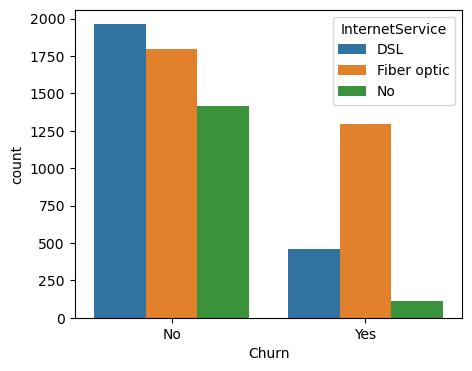

In [13]:
##  Those who have opted for fiber optics are more likely to churn and on the contrary, 
 #  Those who have DSL services have more likely

plt.figure(figsize = (5,4))
sns.countplot(x = 'Churn', hue = 'InternetService', data = df)

<Axes: xlabel='Churn', ylabel='tenure'>

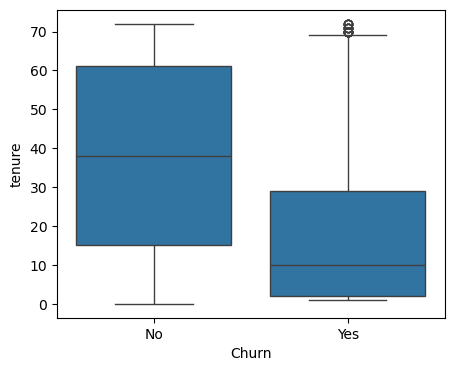

In [14]:
## People who are on low TENURE or who have subscribed for less num of months are more likely to Churn :

plt.figure(figsize = (5,4))
sns.boxplot(x = 'Churn', y = 'tenure', data = df)

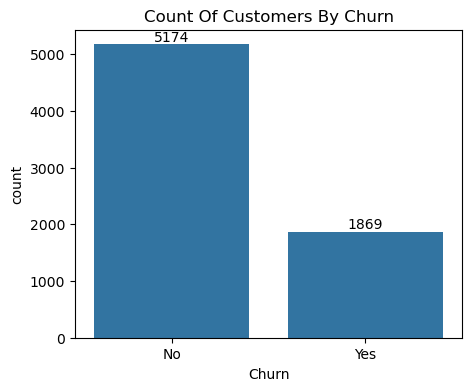

In [15]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn")
plt.show()

In [16]:
gb = df.groupby('Churn').agg({'Churn' : "count"})
gb

,Churn
Churn,
No,5174
Yes,1869


###  4. From the given pie chart we can conclude that 26.54% of our customer have churned out 

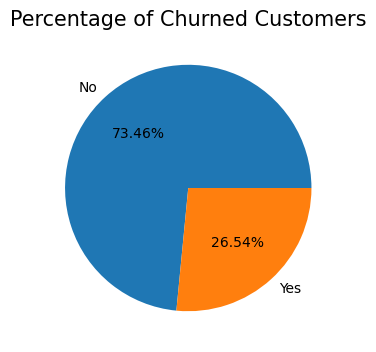

In [17]:
plt.figure(figsize = (5,4))
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 15)
plt.show()

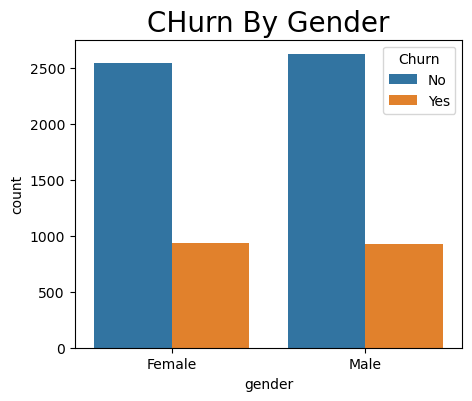

In [18]:
plt.figure(figsize = (5,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title ("CHurn By Gender", fontsize = 20)
plt.show()

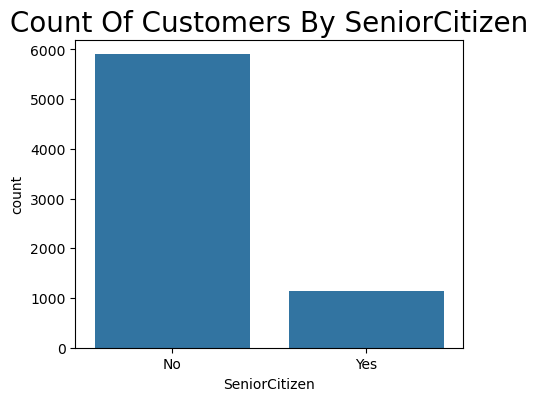

In [19]:
plt.figure(figsize = (5,4))
sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title ("Count Of Customers By SeniorCitizen", fontsize = 20)
plt.show()

### 5.  Comparative a greater percentage of people in SeniorCitizen category have churn :

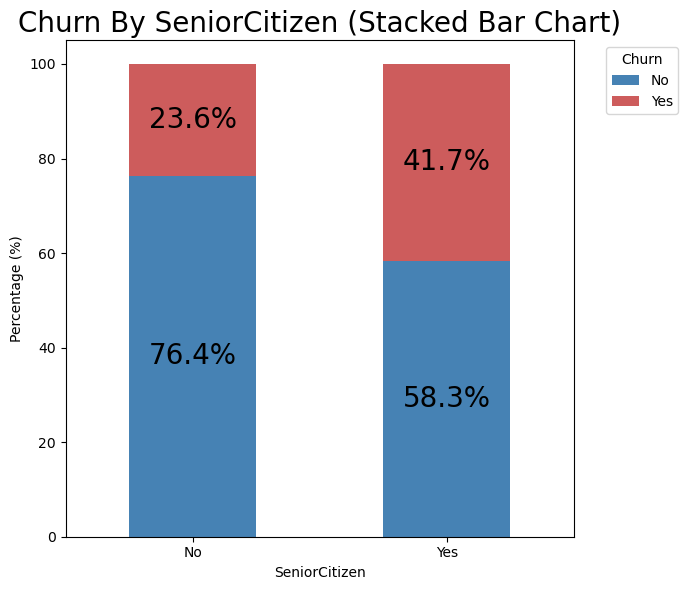

In [20]:
# Group and calculate count data
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert counts to percentages
count_data_percentage = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plot
ax = count_data_percentage.plot(kind='bar', stacked=True, figsize=(7,6), color=['steelblue','indianred'])

# fix percentage labels and size
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2,p.get_y() + height / 2,f'{height:.1f}%',
                ha='center', va='center', color='black', fontsize=20)

# Set labels and title
plt.title('Churn By SeniorCitizen (Stacked Bar Chart)', fontsize = 20)
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


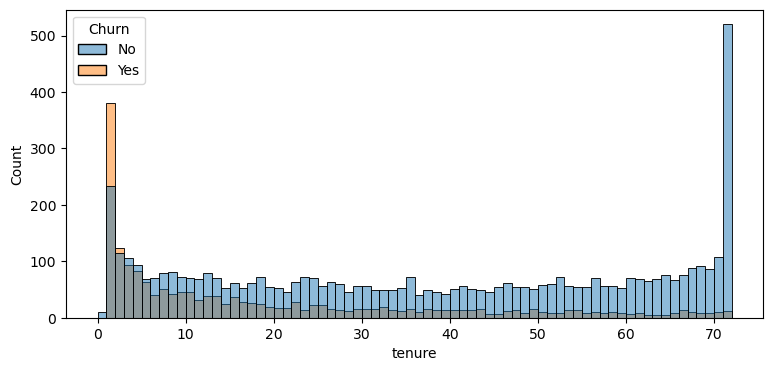

In [21]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

### 6.  People who have used our services for a long time have stayed and people who have used our services                for (1 OR  2)  Months havw Chured :

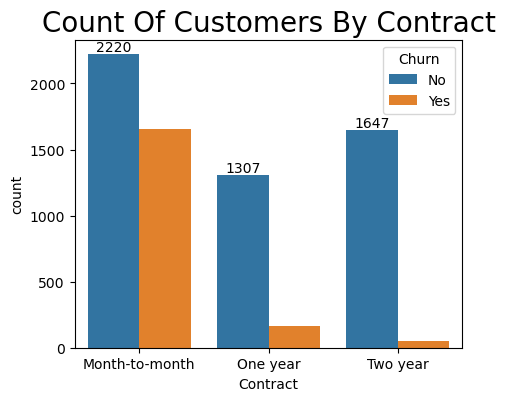

In [22]:
plt.figure(figsize = (5,4))
ax=sns.countplot( x = "Contract", data = df, hue= "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Contract",fontsize = 20)
plt.show()

In [23]:
## Columns to create countplot for :
columns = ['PhoneService','MultipleLines','PaymentMethod', 'Contract', 'InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [24]:
## Set up the Subplot grid AND Calculate number of rows
num_cols = 3
num_rows = (len(columns)+ num_cols - 1) // num_cols

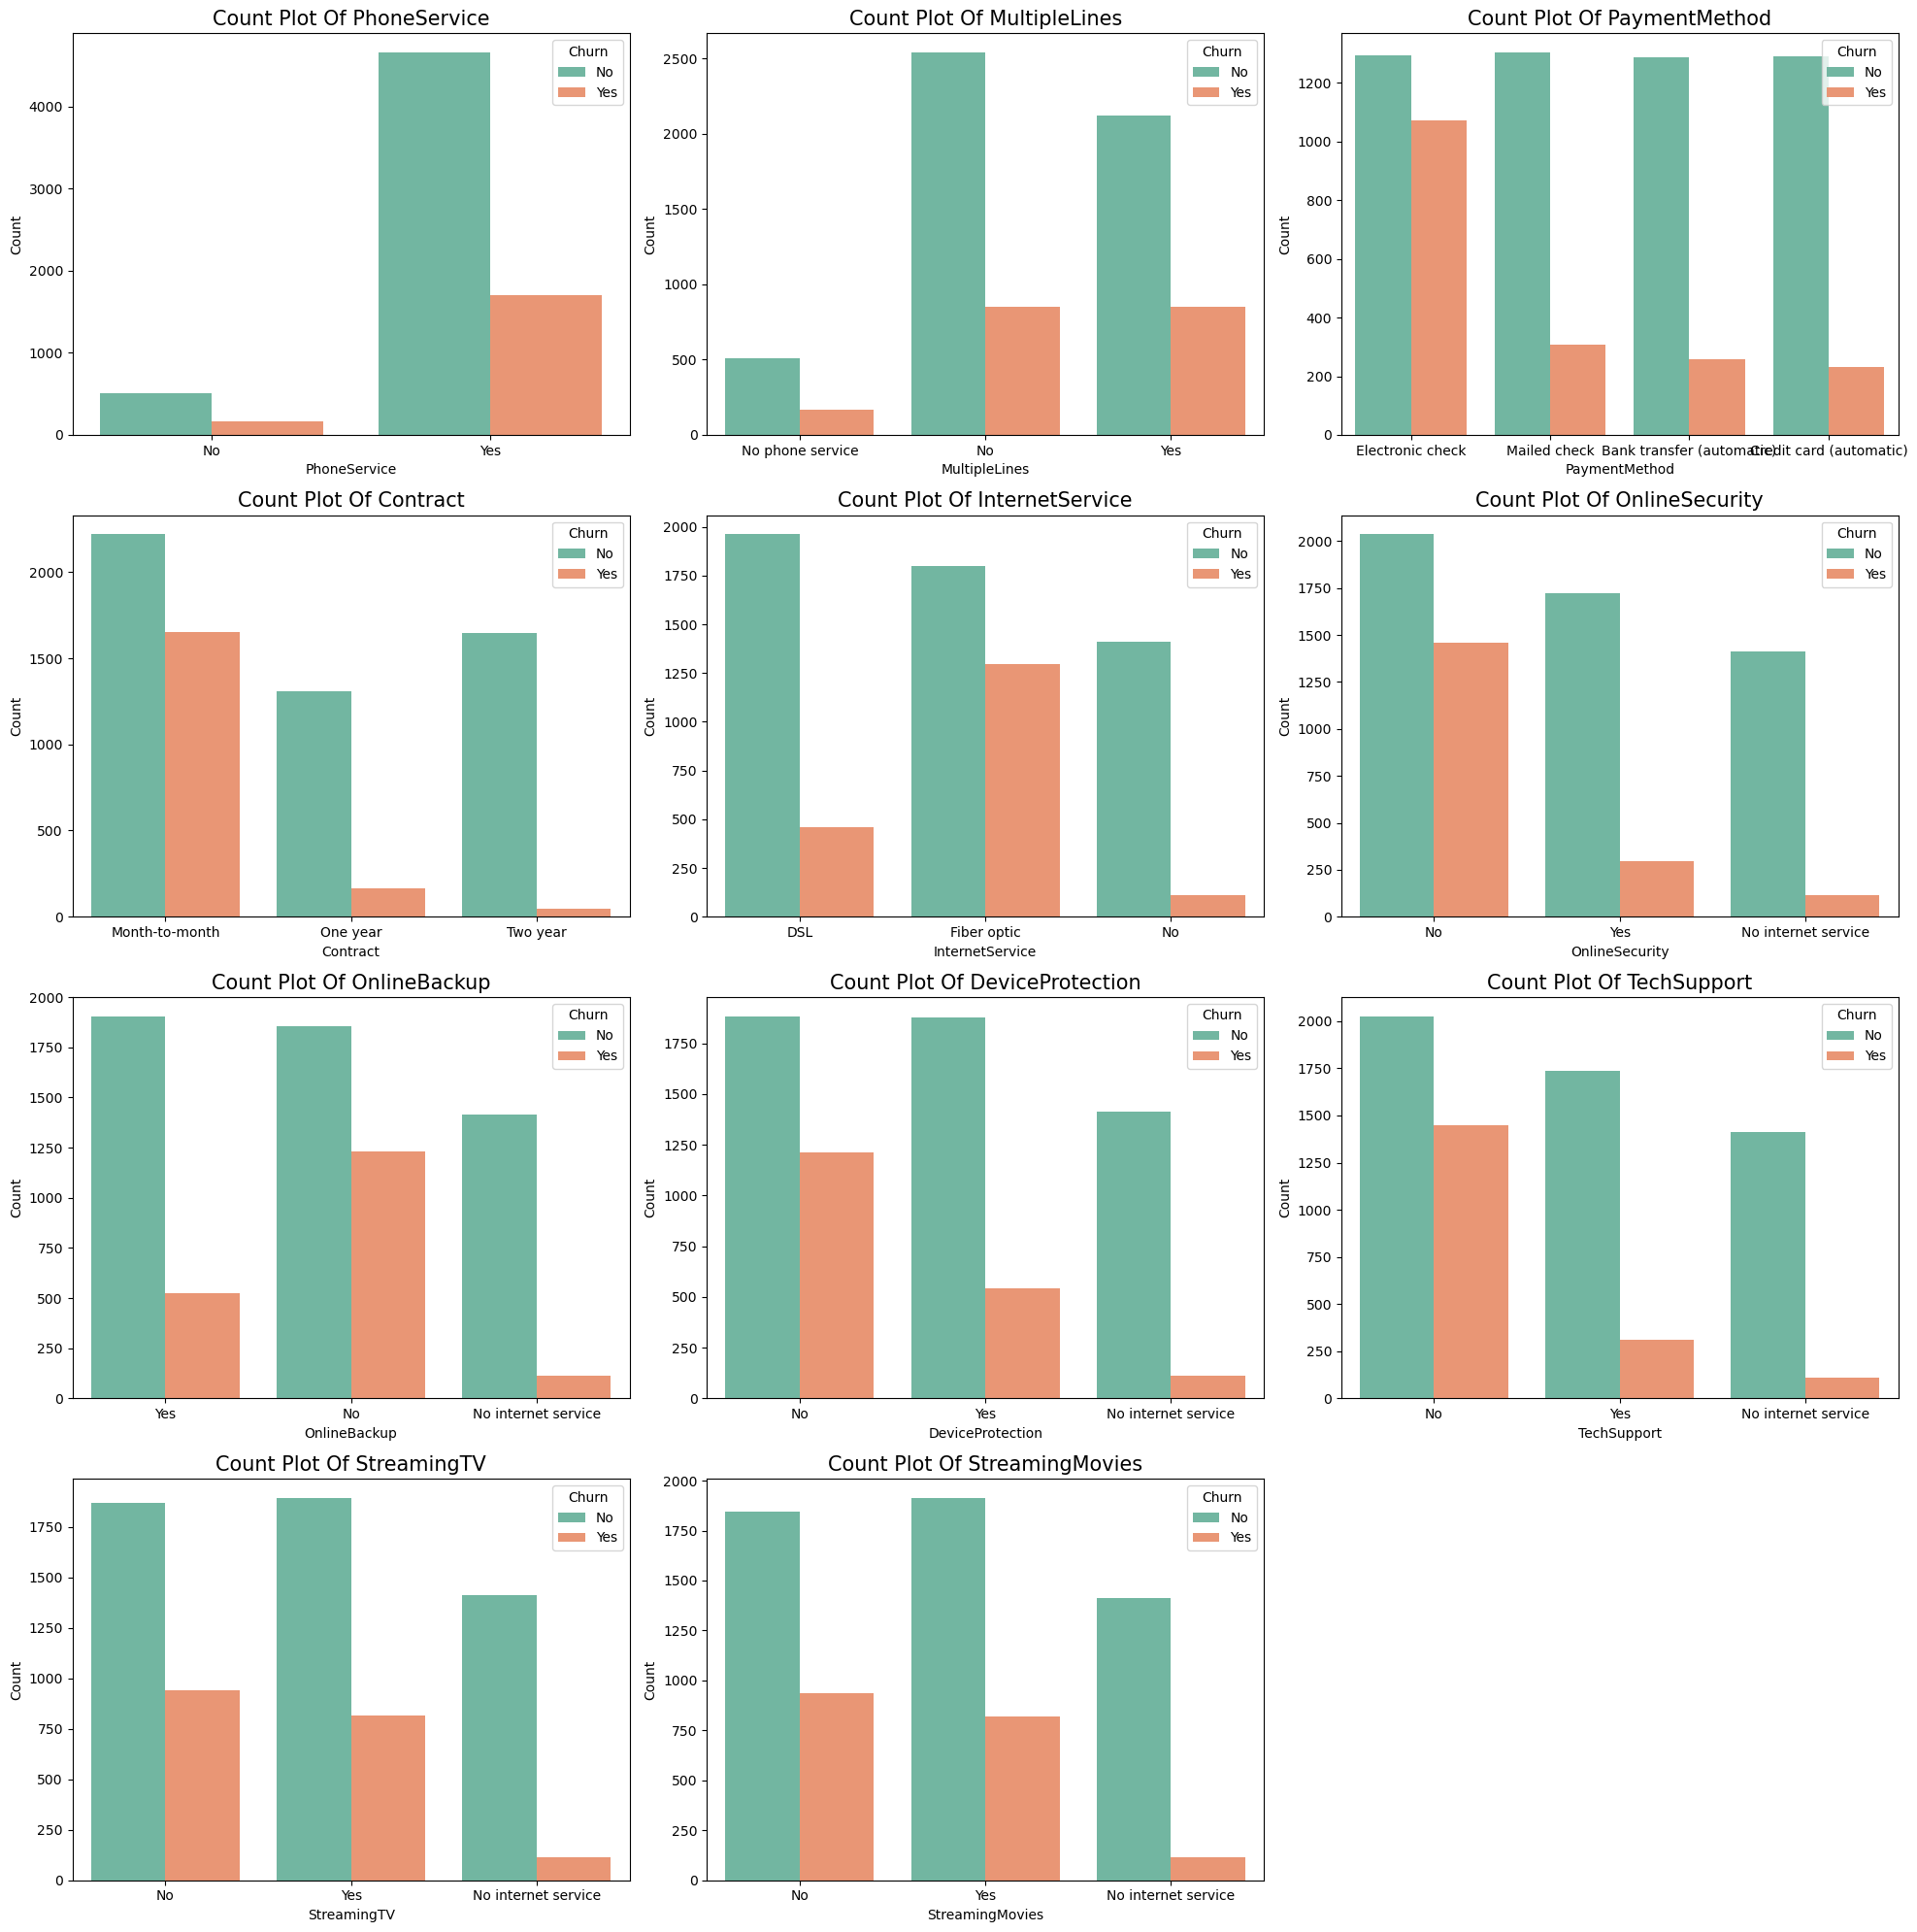

In [25]:
   ## THe mejority of customers who do not churn tend to have services like PhoneService, 
    # InternetService(Perticularly DSL), and OnlineSecurity enabled.
   ## for services like OnlineBackup, TechSupport and StreamingTV churn rates are noticeably
    # higher when these services are not used or are unavailable :

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

## Create countplots for each columns :
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Count Plot Of {col}',fontsize = 15)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


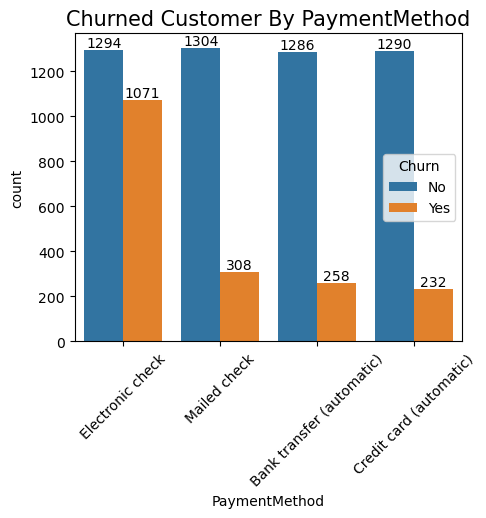

In [26]:
 ##  Customer using electronic checks have the highestchurn rate, while those 
  #  using automatic payments(Bank Transfer or Creadit card) experience significantiy lower churn :
    
plt.figure(figsize=(5,4))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0]) 
ax.bar_label(ax.containers[1]) 
plt.title("Churned Customer By PaymentMethod",fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

# <h1 style="color: blue;">📄 Executive Summary

This report looks at why customers stop using the company’s services. It goes through different things like age, contract type, internet service, and payment method. With the help of charts and graphs, it explains which customers are most likely to leave, and what can be done to keep them.

# 🔍 Main Insights

1. How Many Customers Leave
   Around 26.5% of the people in the data have left the service. This shows that customer loss is a real issue that needs    attention.

2. Age Groups
   Senior citizens are more likely to leave. About 41.7% of them stop using the service, compared to 23.6% of younger        people.
   This means older people might need more support or easier-to-use services.

3. Service Use
   Phone Services: People with phone service, especially those with only one line, leave more than others.

   Internet Services: Users with fiber optic internet leave more often than people using DSL. It could be because of          higher cost or service issues.

   Streaming Services: People who use Streaming TV or Movies leave a little more than those who don’t. They might feel the    service isn’t worth the money.

4. Contract Length
   People with month-to-month contracts are more likely to leave.
   Those who sign up for 1-year or 2-year contracts tend to stay longer. This means longer plans help build loyalty.

5. How They Pay
   Customers who pay using electronic checks are more likely to leave.
   Those who use credit cards or bank transfers usually stay longer. This may be because automatic payments are easier and    more trusted.

6. Extra Services
   People without online security, backup, or tech support leave more.
   Having these services may help customers feel safer and more supported.

# 💡 What Can Be Done

Help Older Customers
Offer simple plans, easier bills, or extra help to make older customers feel comfortable and cared for.

Suggest Longer Plans
Give discounts or rewards to people who choose a longer plan. This helps them stay longer with the company.

Make Payments Easier
Encourage customers to use automatic payments. It’s more convenient and helps avoid missed payments.

Promote Add-On Services
Let people know about helpful features like tech support, security, and device protection. These can give customers peace of mind.

Improve Fiber Internet
Find out why fiber internet users are unhappy and fix those problems—whether it’s speed, price, or something else.

Review Streaming Offers
Ask streaming customers for feedback and try to improve the content or price so they feel they’re getting good value.

# <h1 style="color: blue;">Conclusion :

The analysis presented in this report offers a clear understanding of the key factors contributing to customer churn. 
Targeted retention efforts should focus on senior citizens, customers with month-to-month contracts, and users of 
fiber optic services, as these groups show higher churn tendencies. Implementing incentives for long-term contracts, 
providing optional add-on services, and enhancing overall service quality are among the most effective and actionable 
strategies to reduce churn and strengthen customer loyalty.